In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
import numpy as np
import matplotlib.pyplot as plt

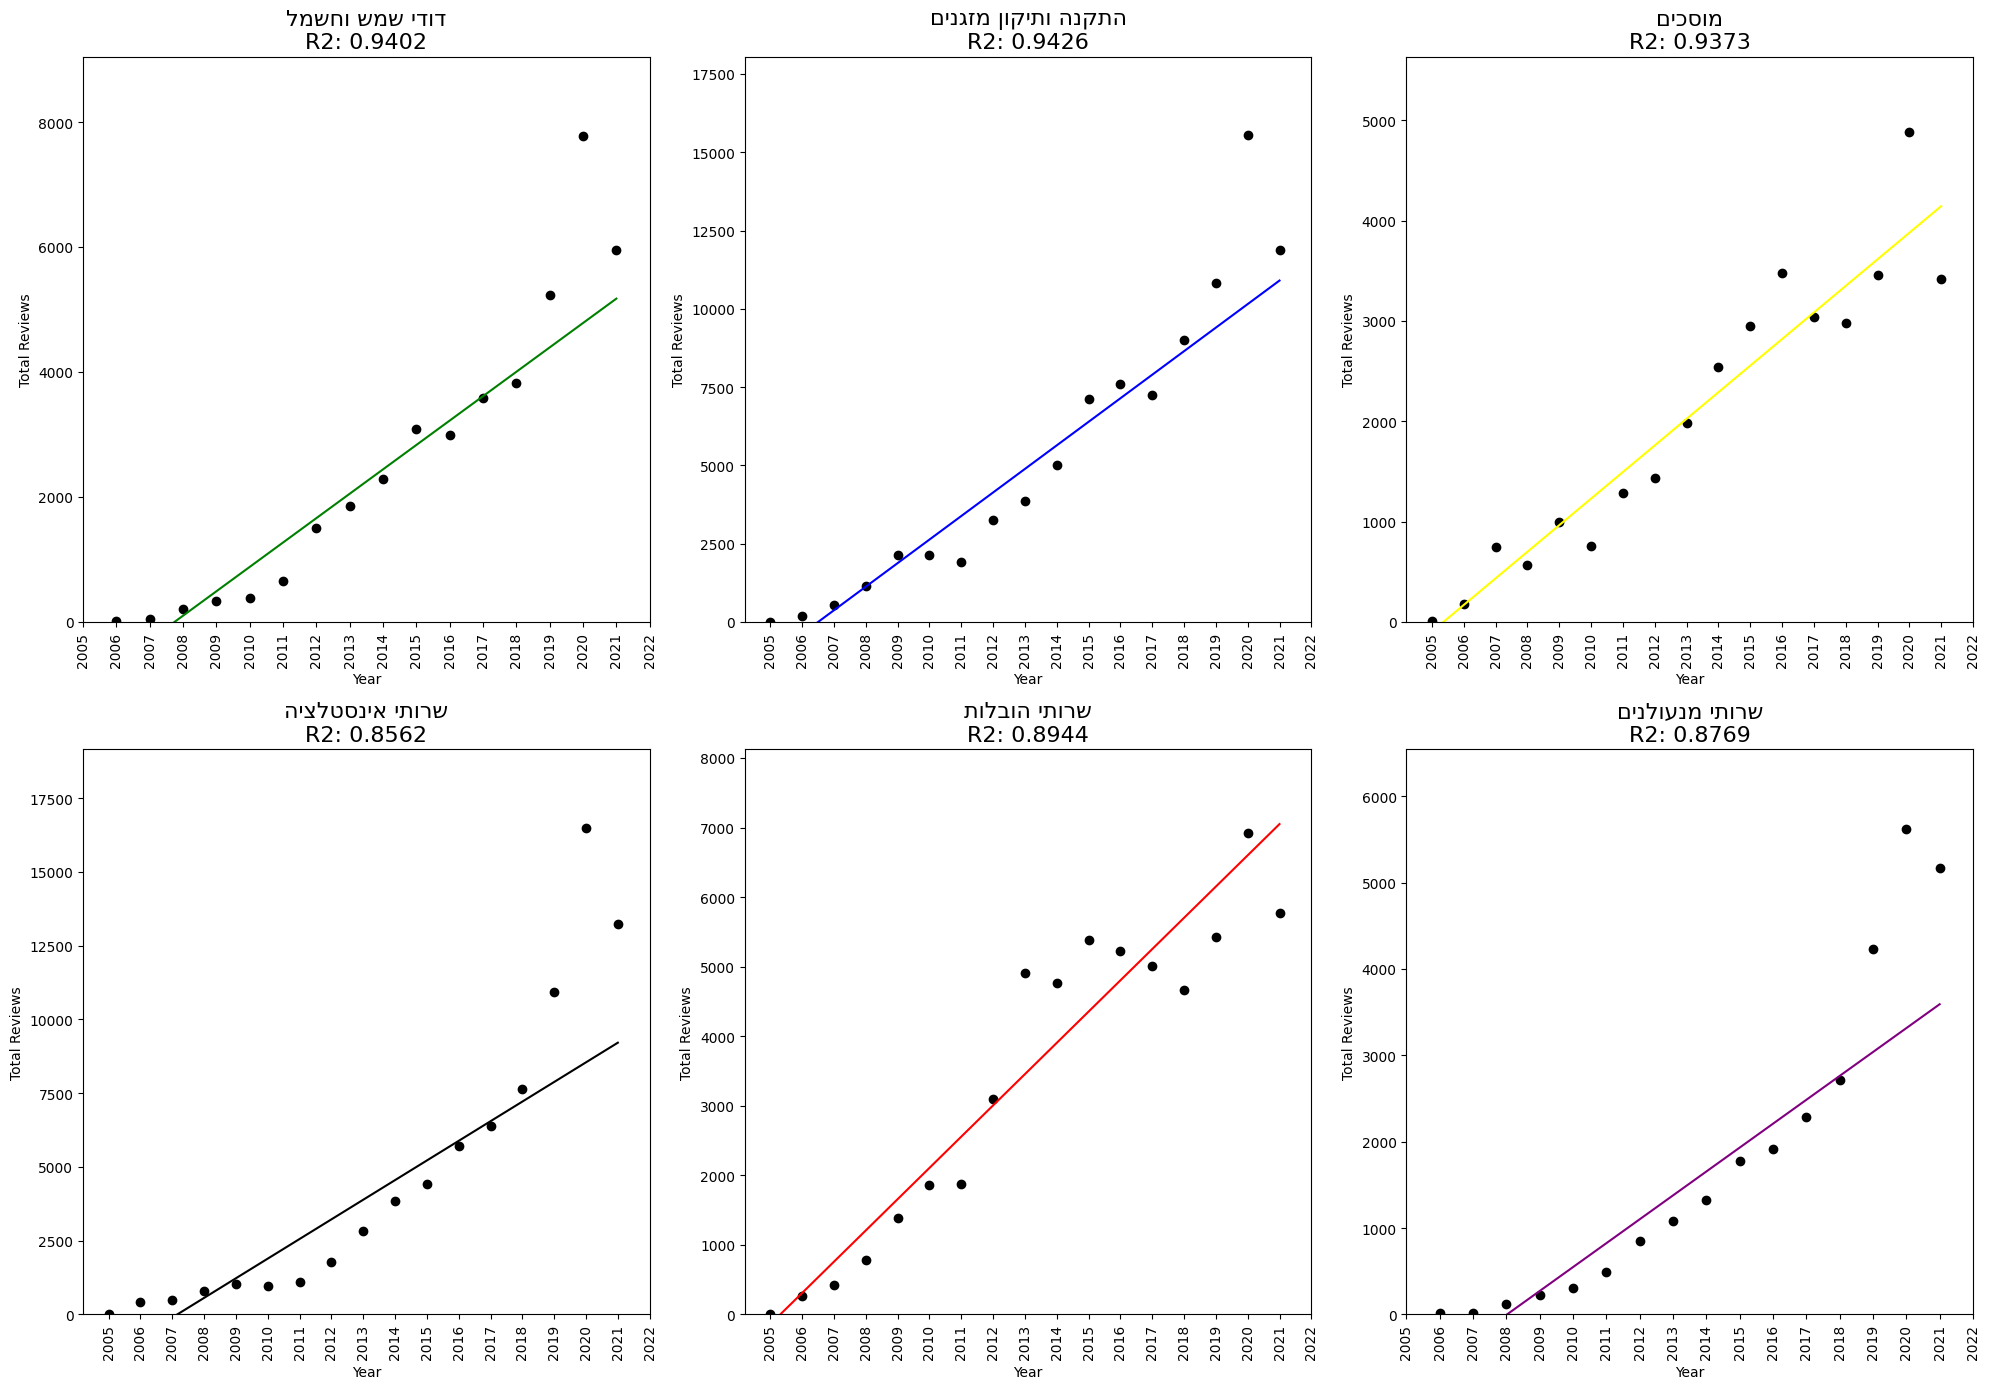

In [16]:
# Creating a Linear Regression Model to predict the total reviews of 2021 based on data of total reviews from 2005-2019 and visualizing it with SubPlots
# *** The year 2020 was excluded from the dataset because of irregularities due to Covid-19 Pandemic

directory = 'data/ML/'
 
fig, axes = plt.subplots(2,3, figsize=(20,14))
colors = [
    ['green', 'blue','yellow'],
    ['black', 'red', 'purple']
]

row, index = 0, 0

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and filename.startswith("summery_"):
        df = pd.read_csv(f)
        LR_df_without_2020, LR_df_temp, LR_y_pred, LR_R2_score = LR_Train(df, filename)

        Display_LR_Plot(LR_df_without_2020, LR_df_temp, LR_y_pred, axes[row, index], filename.replace('summery_', '').replace('.csv', ''), LR_R2_score, colors[row][index])
        
        if index == 2:
            row = 1
            index = 0
        else:
            index+=1
        # print(df)

fig.tight_layout()

In [15]:
def LR_Train(df:pd.DataFrame, cat):
    df_main = df.copy()
    df = df.drop(index=df[df['Year'] == 2020].index) # (2020 was the year when Covid-19 started spreading globally)
    
    year = 2020
    train = df[df["Year"] <= year]
    test = df[df["Year"] > year]

    X_train = train[["Year"]].values
    X_test = test[["Year"]].values
    y_train = train[["Total Reviews"]].values
    y_test = test["Total Reviews"].values

    reg = LinearRegression().fit(X_train, y_train)
    r2_score = round(reg.score(X_train, y_train), 4)
    y_pred = reg.predict(df["Year"].values.reshape(-1,1))

    return df, df_main, y_pred, r2_score


In [11]:
def Display_LR_Plot(df:pd.DataFrame, df_temp:pd.DataFrame, y_pred, axis:pd.DataFrame.axes, title, reg_score, color):
   
    axis.scatter(x = df_temp["Year"], y = df_temp["Total Reviews"], color="black")
    axis.plot(df["Year"], y_pred, color=color)
    
    title = title[::-1] + f'\nR2: { reg_score }' 
    axis.set_title(title, fontsize=16)

    axis.set_ymargin(0.15)
    axis.set_xlabel("Year")
    axis.set_ylabel("Total Reviews")

    axis.set_xticks(np.arange(2005, 2023, dtype=float))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

    axis.set_ylim(bottom=0)